<a href="https://colab.research.google.com/github/StevenVuong/MSc_Project/blob/master/misc5(gaussian_mask).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# standard imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline

# to mount our drive
from google.colab import drive

# import keras stuff
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution3D, MaxPooling3D, Convolution1D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD, RMSprop, Adam
from keras.utils import np_utils, generic_utils, to_categorical
from keras.layers import LeakyReLU
from keras import regularizers

# to test our dataset
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# for gaussian mask
from scipy.ndimage import gaussian_filter

In [7]:
# mount google drive
drive.mount('/content/gdrive')

os.chdir('/content')

# go to where the data is
print (os.listdir())
os.chdir('gdrive/My Drive/msc_project/all_mprage_grappa')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
['.config', 'gdrive', 'sample_data']


In [0]:
# gets our y-values and converts to keras, one hot encoded outputs
def get_y_values(total_slices_info):
  
  y_values = [s[2] for s in total_slices_info]

  y_values = np.array(to_categorical(y_values, 2))
  
  return y_values

**In this notebook we will experiment with a Gaussian mask and/or very few number of 2D slices to make up our 3D imae to see if it works in our classifier**

In [0]:
# Load a batch
# Apply gaussian filter
# try run through model
# test

In [0]:
# Load a batch
with open('processed_brains/processed_brains_aug/dbatch0.pkl', 'rb') as f:
  total_slices, total_slices_info = pickle.load(f) 

In [0]:
# apply gaussian mask to our images
for i in range(len(total_slices[:,:,:,:,0])):
  ts = total_slices[i, :, :, :, 0]
  for j in range(len(ts)):
    s = ts[j, :, :]
    ## apply gaussian mask
    tg = gaussian_filter(s, sigma=3) # will have to play around with this to get optimal value
    ts[j, :, :] = tg
  total_slices[i, :, :, :, 0] = ts

In [0]:
total_slices = total_slices[:, 45:115, :, :, :]
np.shape(total_slices)

(100, 70, 160, 160, 1)

In [0]:
# get y values
y_values = get_y_values(total_slices_info)

**Combine all into a super array**

In [0]:
# write something to get all the slices, process and add to a super array

In [0]:
# build the first one
total_slices_all = []
total_info_all = []

total_slices_all.append(total_slices)
total_info_all.append(y_values)

total_slices_all = np.array(total_slices_all)[0]
total_info_all = np.array(total_info_all)[0]

print ("Shape of total slices all: %s" %(np.shape(total_slices_all),))
print ("Shape of total y values all: %s" %(np.shape(total_info_all),))

Shape of total slices all: (100, 70, 160, 160, 1)
Shape of total y values all: (100, 2)


In [0]:
# add on other slices
total_slices_all = np.concatenate((total_slices_all, total_slices))
total_info_all = np.concatenate((total_info_all, y_values))

print ("Shape of total slices all: %s" %(np.shape(total_slices_all),))
print ("Shape of total slices all: %s" %(np.shape(total_info_all),))

Shape of total slices all: (200, 70, 160, 160, 1)
Shape of total slices all: (200, 2)


**Below is one stop integrated cell (super messy) to build our super arrays of sigmified brainslices**

In [8]:
# just set the sigma value and run
sigma_value = 3.0

total_slices_all = []
total_info_all = []

for iii in range(5):
  with open('processed_brains/processed_brains_aug/dbatch'+str(iii)+'.pkl', 'rb') as f:
    total_slices, total_slices_info = pickle.load(f) 
    
  # apply gaussian mask to our images
  for i in range(len(total_slices[:,:,:,:,0])):
    ts = total_slices[i, :, :, :, 0]
    for j in range(len(ts)):
      s = ts[j, :, :]
      ## apply gaussian mask
      tg = gaussian_filter(s, sigma = sigma_value) # will have to play around with this to get optimal value
      ts[j, :, :] = tg
    total_slices[i, :, :, :, 0] = ts
    
  # get the region of slices we want    
  total_slices = total_slices[:, 45:115, :, :, :]
  
  # get y values
  y_values = get_y_values(total_slices_info)

  # for first run, make that the array and go from there
  if (iii == 0):# i has been hijacked
    # append to super array
    total_slices_all = total_slices
    total_info_all = y_values
    total_slices_all = np.array(total_slices_all)
    total_info_all = np.array(total_info_all)
    
    # add on the other for non-zero values
  if (iii != 0):
    total_slices_all = np.concatenate((total_slices_all, total_slices))
    total_info_all = np.concatenate((total_info_all, y_values))
  
print ("Shape of total slices all: %s" %(np.shape(total_slices_all),))
print ("Shape of total y values all: %s" %(np.shape(total_info_all),))

Shape of total slices all: (440, 70, 160, 160, 1)
Shape of total y values all: (440, 2)


**Can skip straight to below if want to just use 3sig slices**

In [0]:
# save as pickle files
pickle.dump( total_slices_all, open( "gaussian_mask/3sig_slice.p", "wb" ) )
pickle.dump( total_info_all, open( "gaussian_mask/3sig_info.p", "wb" ) )

# load our pickle files now
# total_slices_all = pickle.load( open( "gaussian_mask/3sig_slice.p", "rb" ) )
# total_info_all = pickle.load( open( "gaussian_mask/3sig_info.p", "rb" ) )

**Run our model now**

In [0]:
# split to training and test set
X_train, X_test, y_train, y_test = train_test_split(total_slices_all, total_info_all, test_size=0.15)

In [0]:
def initialise_model():

  # compile our model
  model = Sequential()
  
  model.add(Convolution3D(filters=32, kernel_size=3, padding='same', strides=2, input_shape=(70,160,160,1),
                          kernel_regularizer=regularizers.l2(0.007), bias_regularizer=regularizers.l2(0.007))) # padding on first one only?
  model.add(LeakyReLU(alpha=0.15)) # set to 0.01
  model.add(BatchNormalization(momentum=0.2))
  model.add(MaxPooling3D(pool_size=2, strides=1, padding='same')) # pool_size=2
  # could user he_norm kernel initializer?
  
  model.add(Convolution3D(filters=64, kernel_size=3, padding='same', strides=2,
                          kernel_regularizer=regularizers.l2(0.007), bias_regularizer=regularizers.l2(0.007))) # padding on first one only?
  model.add(LeakyReLU(alpha=0.15)) # set to 0.01
  model.add(BatchNormalization(momentum=0.2))
  model.add(MaxPooling3D(pool_size=2, strides=1, padding='same')) # pool_size=2
  
  model.add(Convolution3D(filters=128, kernel_size=3, padding='same', strides=2,
                          kernel_regularizer=regularizers.l2(0.007), bias_regularizer=regularizers.l2(0.007))) # padding on first one only?
  model.add(LeakyReLU(alpha=0.15)) # set to 0.01
  model.add(BatchNormalization(momentum=0.2))
  model.add(MaxPooling3D(pool_size=2, strides=1, padding='same')) # pool_size=2

  model.add(Convolution3D(filters=256, kernel_size=3, padding='same', strides=2,
                          kernel_regularizer=regularizers.l2(0.007), bias_regularizer=regularizers.l2(0.007))) # padding on first one only?
  model.add(LeakyReLU(alpha=0.15)) # set to 0.01
  model.add(BatchNormalization(momentum=0.2))
  model.add(MaxPooling3D(pool_size=2, strides=1, padding='same')) # pool_size=2
  
  model.add(Convolution3D(filters=512, kernel_size=2, padding='same', strides=2,
                          kernel_regularizer=regularizers.l2(0.007), bias_regularizer=regularizers.l2(0.007))) # padding on first one only?
  model.add(LeakyReLU(alpha=0.15)) # set to 0.01
  model.add(BatchNormalization(momentum=0.2))
  model.add(MaxPooling3D(pool_size=2, strides=2, padding='same')) # pool_size=2
  
  model.add(Flatten())
   
  model.add(Dense(512, kernel_regularizer=regularizers.l2(0.007)))
  model.add(LeakyReLU(alpha=0.15)) # set to 0.01
  
  model.add(Dropout(0.20)) # add dropout to prevent overfitting
  
  model.add(Dense(64, kernel_regularizer=regularizers.l2(0.007)))
  model.add(LeakyReLU(alpha=0.15)) # set to 0.01
  
  model.add(Dropout(0.35)) # add dropout to prevent overfitting

  model.add(Dense(2, activation='softmax'))

  model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy',metrics = ['categorical_accuracy'])

  return model

In [12]:
model = initialise_model()
model.summary()

W0717 10:20:26.753379 139959166199680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 10:20:26.815756 139959166199680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 10:20:26.831476 139959166199680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0717 10:20:26.971686 139959166199680 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0717 10:20:27.643714 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 35, 80, 80, 32)    896       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 35, 80, 80, 32)    0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 35, 80, 80, 32)    128       
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 35, 80, 80, 32)    0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 18, 40, 40, 64)    55360     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 18, 40, 40, 64)    0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 18, 40, 40, 64)    256       
__________

In [0]:
hist = model.fit(x=X_train, y=y_train, batch_size = 15, epochs=500, verbose=1, shuffle=True,validation_split=0.05)

W0717 10:20:28.007754 139959166199680 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 355 samples, validate on 19 samples
Epoch 1/500
285/355 [=======================>......] - ETA: 4s - loss: 13.6222 - categorical_accuracy: 0.5263

**Diagnostics**

In [0]:
###############################################################################################
## LOAD DIAGNOSTICS ##
###############################################################################################
X_train, X_test, y_train, y_test, model, hist, score, acc =  pickle.load( open( "gaussian_mask/3sig_diagnostics.p", "rb" ) )

In [20]:
score, acc = model.evaluate(X_test, y_test)
print ("The score of the model: %f, The mean accuracy of the model: %f" % (score, acc))

66/66 [==============================] - 2s 23ms/step
The score of the model: 0.477983, The mean accuracy of the model: 0.939394


dict_keys(['val_loss', 'val_categorical_accuracy', 'loss', 'categorical_accuracy'])


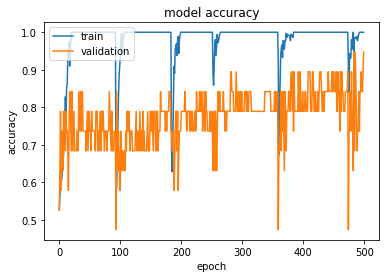

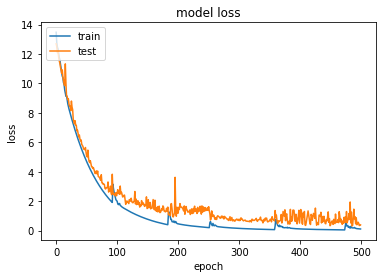

In [21]:
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# list all data in history
print(hist.history.keys())
# summarize history for accuracy
plt.plot(hist.history['categorical_accuracy'])
plt.plot(hist.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Save train set, test set, score, accuracy and history**

In [0]:
###############################################################################################
# SAVE DIAGNOSTICS #
###############################################################################################
all_diagnostics = [X_train, X_test, y_train, y_test, model, hist, score, acc]
pickle.dump( all_diagnostics, open( "gaussian_mask/3sig_diagnostics.p", "wb" ) )

**Visualise brains**

In [0]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets # interactive plots
import matplotlib.pyplot as plt
%matplotlib inline

slice_ex = total_slices[50, :, :, :, 0]
def g(i): # basic slideshow plot to get an idea of the effectiveness of the mask itself
    plt.figure(figsize=(15,8)) # make plot larger
    plt.imshow(slice_ex[i])
    plt.show()
    # plt.imsave('figures/axial_processed2.png', slice_ex[i])
    return None

interact(g, i=widgets.IntSlider(min=0,max=(len(slice_ex)-1),step=1,value=0)); # 140 for axial view. 88 for sag